In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [11]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [13]:
X=df.drop("Purchased",axis=1)
Y=df["Purchased"]

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=5)

In [24]:
m=LogisticRegression(random_state=0)
m.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [25]:
Y_pred=m.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, confusion_matrix

In [28]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[63,  3],
       [14, 20]], dtype=int64)

<AxesSubplot:>

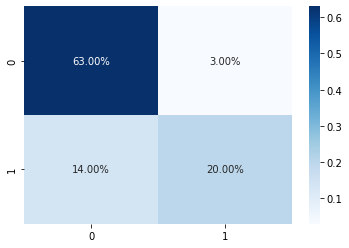

In [32]:
sns.heatmap(cm/np.sum(cm),annot=True,cmap="Blues",fmt='.2%')

In [33]:
row_sum=np.sum(cm, axis=0)
col_sum=np.sum(cm,axis=1)
TP=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TN=cm[1][1]


In [34]:
precision=TP/(TP+FP)
precision

0.9545454545454546

In [35]:
recall=TP/(TP+FN)
recall


0.8181818181818182

In [37]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.83